In [25]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster
import statsmodels.api as sm
from scipy import stats

In [26]:
# Load the dataset into a DataFrame
# df = pd.read_csv('data/kc_house_data.csv')
df = pd.read_csv('data/updated_housing.csv')

Checking info, nulls

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29211 entries, 0 to 29210
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29211 non-null  int64  
 1   date           29211 non-null  object 
 2   price          29211 non-null  float64
 3   bedrooms       29211 non-null  int64  
 4   bathrooms      29211 non-null  float64
 5   sqft_living    29211 non-null  int64  
 6   sqft_lot       29211 non-null  int64  
 7   floors         29211 non-null  float64
 8   waterfront     29211 non-null  object 
 9   greenbelt      29211 non-null  object 
 10  nuisance       29211 non-null  object 
 11  view           29211 non-null  object 
 12  condition      29211 non-null  object 
 13  grade          29211 non-null  object 
 14  heat_source    29182 non-null  object 
 15  sewer_system   29198 non-null  object 
 16  sqft_above     29211 non-null  int64  
 17  sqft_basement  29211 non-null  int64  
 18  sqft_g

- 30155 long
- lots of object types
- heat_source and sewer_system have nulls

Looking further into the null and duplicate values

In [28]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      29
sewer_system     13
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
geometry          0
MHHI1             0
traffic_de        0
toxic_rele        0
hazardou_2        0
SCHDST            0
NAME              0
DSTNUM            0
dtype: int64

In [29]:
# locating duplicates
print(f'Number of Duplicates: {df.duplicated().sum()}')
df.loc[df.duplicated() == True]

Number of Duplicates: 1


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,lat,long,geometry,MHHI1,traffic_de,toxic_rele,hazardou_2,SCHDST,NAME,DSTNUM
24338,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,47.68069,-122.172135,POINT (-122.172135 47.680690000000006),95625.0,6.0,3786.715617,2.0,414,Lake Washington,17414


Function for droping duplicates, nulls, and other specified columns

In [30]:
def dropper(df, one=None, two=None, three=None):
    '''
    Input: DataFrame, request 1,request 2, request 3
    requests:
    'duplicates' to drop duplicates
    'nulls' to drop null values
    list containing df column names l = ['','','']
    '''
    request = [one,two,three]
    if 'duplicates' in request:
        df = df.drop_duplicates()
    if 'nulls' in request:
        df = df.dropna()
    for req in request:
        if isinstance(req, list):
            df = df.drop(columns=req, axis=1)
    return(df)

- below we drop duplicates and null values, in total there is only 1 duplicated row and 42 null values

In [31]:

droping =['id','geometry','address','NAME','DSTNUM']
df_clean = dropper(df, 'duplicates', 'nulls', droping)

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 29210
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           29170 non-null  object 
 1   price          29170 non-null  float64
 2   bedrooms       29170 non-null  int64  
 3   bathrooms      29170 non-null  float64
 4   sqft_living    29170 non-null  int64  
 5   sqft_lot       29170 non-null  int64  
 6   floors         29170 non-null  float64
 7   waterfront     29170 non-null  object 
 8   greenbelt      29170 non-null  object 
 9   nuisance       29170 non-null  object 
 10  view           29170 non-null  object 
 11  condition      29170 non-null  object 
 12  grade          29170 non-null  object 
 13  heat_source    29170 non-null  object 
 14  sewer_system   29170 non-null  object 
 15  sqft_above     29170 non-null  int64  
 16  sqft_basement  29170 non-null  int64  
 17  sqft_garage    29170 non-null  int64  
 18  sqft_p

Converting time column to datetime format

In [33]:
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%m/%d/%Y')

Function for converting boolean catagoricals into numeric booleans 

In [34]:
def convert_boolean(df,x=None):
    '''
    This function converts all boolean data into numeric types
    Used in numeric_df
    input dataframe
    '''
    boolean_cols = df.select_dtypes(include='object').columns
    column_name = []
    for col in boolean_cols:
        if set(df[col].unique()) == {'YES', 'NO'}:
            df[col] = df[col].replace({"NO": 0, "YES": 1})
            column_name.append(col)
            
    print(f'Boolean Conversions:{column_name}')
#     return(df)
#     if x != None:
#         print(f'Boolean Conversions:{column_name}')
#     else:
#         print(display(df.head()),column_name)
    return(df)

In [35]:
df_clean = convert_boolean(df_clean)

Boolean Conversions:['waterfront', 'greenbelt', 'nuisance']


In [36]:
df_clean.reset_index()

,index,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,lat,long,MHHI1,traffic_de,toxic_rele,hazardou_2,SCHDST
0,0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,0,0,...,40,1969,0,47.461975,-122.190520,58901.0,6.0,18700.612670,10.0,403
1,1,2022-03-29,728000.0,4,2.0,2170,7520,1.0,0,0,...,60,1973,0,47.463930,-122.189740,58901.0,6.0,18700.612670,10.0,403
2,2,2021-12-28,645000.0,3,2.0,1520,8250,1.0,0,0,...,200,1981,0,47.460870,-122.188690,58901.0,6.0,18700.612670,10.0,403
3,3,2022-05-10,760600.0,3,2.5,2570,2889,2.0,0,0,...,100,2006,0,47.450005,-122.189080,58901.0,6.0,18700.612670,10.0,403
4,4,2021-09-12,624950.0,3,2.5,1610,8625,1.0,0,0,...,80,1979,0,47.460500,-122.191035,58901.0,6.0,18700.612670,10.0,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,29206,2021-12-28,380000.0,2,1.0,800,9927,1.5,0,0,...,0,1981,0,47.712520,-121.315030,88409.0,5.0,823.898408,1.0,404
29166,29207,2021-08-05,199000.0,2,1.0,1150,10098,1.5,0,0,...,220,1972,0,47.766720,-121.482380,88409.0,5.0,823.898408,1.0,404
29167,29208,2022-05-17,395000.0,1,1.0,620,10400,1.5,0,0,...,100,1981,0,47.712560,-121.319590,88409.0,5.0,823.898408,1.0,404
29168,29209,2021-07-09,328000.0,2,1.5,980,5000,2.0,0,0,...,260,1922,2003,47.707580,-121.359050,88409.0,5.0,823.898408,1.0,404


In [37]:
df_clean

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_patio,yr_built,yr_renovated,lat,long,MHHI1,traffic_de,toxic_rele,hazardou_2,SCHDST
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,0,0,0,...,40,1969,0,47.461975,-122.190520,58901.0,6.0,18700.612670,10.0,403
1,2022-03-29,728000.0,4,2.0,2170,7520,1.0,0,0,0,...,60,1973,0,47.463930,-122.189740,58901.0,6.0,18700.612670,10.0,403
2,2021-12-28,645000.0,3,2.0,1520,8250,1.0,0,0,0,...,200,1981,0,47.460870,-122.188690,58901.0,6.0,18700.612670,10.0,403
3,2022-05-10,760600.0,3,2.5,2570,2889,2.0,0,0,0,...,100,2006,0,47.450005,-122.189080,58901.0,6.0,18700.612670,10.0,403
4,2021-09-12,624950.0,3,2.5,1610,8625,1.0,0,0,0,...,80,1979,0,47.460500,-122.191035,58901.0,6.0,18700.612670,10.0,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29206,2021-12-28,380000.0,2,1.0,800,9927,1.5,0,0,1,...,0,1981,0,47.712520,-121.315030,88409.0,5.0,823.898408,1.0,404
29207,2021-08-05,199000.0,2,1.0,1150,10098,1.5,0,0,1,...,220,1972,0,47.766720,-121.482380,88409.0,5.0,823.898408,1.0,404
29208,2022-05-17,395000.0,1,1.0,620,10400,1.5,0,0,1,...,100,1981,0,47.712560,-121.319590,88409.0,5.0,823.898408,1.0,404
29209,2021-07-09,328000.0,2,1.5,980,5000,2.0,0,0,0,...,260,1922,2003,47.707580,-121.359050,88409.0,5.0,823.898408,1.0,404


In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 29210
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29170 non-null  datetime64[ns]
 1   price          29170 non-null  float64       
 2   bedrooms       29170 non-null  int64         
 3   bathrooms      29170 non-null  float64       
 4   sqft_living    29170 non-null  int64         
 5   sqft_lot       29170 non-null  int64         
 6   floors         29170 non-null  float64       
 7   waterfront     29170 non-null  int64         
 8   greenbelt      29170 non-null  int64         
 9   nuisance       29170 non-null  int64         
 10  view           29170 non-null  object        
 11  condition      29170 non-null  object        
 12  grade          29170 non-null  object        
 13  heat_source    29170 non-null  object        
 14  sewer_system   29170 non-null  object        
 15  sqft_above     2917

# converting to numeric types

In [39]:
df_clean['heat_source'].value_counts()

Gas                  20147
Electricity           5950
Oil                   2899
Gas/Solar               93
Electricity/Solar       57
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [40]:
def numeric_housing(df): 
    '''
    This function converts all boolean or rating types into numerics from input df. 
    this is saved as df_numeric
    This only works with housing data
    '''

    df_numeric = df.copy()

    # Returns the new df_clean and lists the columns changed
    convert_boolean(df_numeric,1)

    # adjusting view column 
    # View has no intupretation written so it was self interpreted
    df_numeric["view"] = df_numeric["view"].replace({"NONE": 0,
                                                 "FAIR": 1,
                                                 "AVERAGE": 2,
                                                 "GOOD": 3,
                                                 "EXCELLENT": 4,})

    # adjusting condition column 
    # View https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#c 
    # under building condition it lists the order
    df_numeric["condition"] = df_numeric["condition"].replace({"Poor": 0,
                                                "Fair": 1,
                                                 "Average": 2,
                                                 "Good": 3,
                                                 "Very Good": 4,})
    # adjusting grade column 
    # View https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#c 
    # under building grade it lists the order
    # they list the assosiated number with in name, i replaced it to just be the number
    df_numeric["grade"] = df_numeric["grade"].replace({"2 Substandard": 2,
                                              "3 Poor": 3,
                                              "4 Low": 4,
                                              "5 Fair": 5,
                                              "6 Low Average": 6,
                                              "7 Average": 7,
                                              "8 Good": 8,
                                              "9 Better": 9,
                                              "10 Very Good": 10,
                                              "11 Excellent": 11,
                                              "12 Luxury": 12,
                                              "13 Mansion": 13,})
   
    
    
    
    adjusted = ['view','condition', 'grade','date']
    
    print(f'Rating Conversions: {adjusted}')
#     print(display(df_numeric.head()))
    return(df_numeric)
df_clean = numeric_housing(df_clean)

Boolean Conversions:[]
Rating Conversions: ['view', 'condition', 'grade', 'date']


In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 29210
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29170 non-null  datetime64[ns]
 1   price          29170 non-null  float64       
 2   bedrooms       29170 non-null  int64         
 3   bathrooms      29170 non-null  float64       
 4   sqft_living    29170 non-null  int64         
 5   sqft_lot       29170 non-null  int64         
 6   floors         29170 non-null  float64       
 7   waterfront     29170 non-null  int64         
 8   greenbelt      29170 non-null  int64         
 9   nuisance       29170 non-null  int64         
 10  view           29170 non-null  int64         
 11  condition      29170 non-null  int64         
 12  grade          29170 non-null  int64         
 13  heat_source    29170 non-null  object        
 14  sewer_system   29170 non-null  object        
 15  sqft_above     2917

# Creating Dummy variables

In [42]:
def for_dummies(df,column):
    '''
    Function takes a dataframe and a column or a list or columns
    creates a dummy variable for each specified column, 
    drops column with heighest value count
    '''
    dropped = str(df[column].value_counts().idxmax())
    name_drop = column + '_' +dropped
    print(f'Dropped Column: {name_drop}')
    df_dum = pd.get_dummies(df, columns=[column], drop_first=False)
    df_dum = df_dum.drop(columns=name_drop)
    
    return(df_dum)

In [43]:
# Changing type of SCHDST for int to object
df_clean['SCHDST'] = df_clean['SCHDST'].astype(object)
df_clean = for_dummies(df_clean, 'SCHDST')

Dropped Column: SCHDST_1


In [44]:
df_clean.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'lat', 'long',
       'MHHI1', 'traffic_de', 'toxic_rele', 'hazardou_2', 'SCHDST_210',
       'SCHDST_216', 'SCHDST_400', 'SCHDST_401', 'SCHDST_402', 'SCHDST_403',
       'SCHDST_404', 'SCHDST_405', 'SCHDST_406', 'SCHDST_407', 'SCHDST_408',
       'SCHDST_409', 'SCHDST_410', 'SCHDST_411', 'SCHDST_412', 'SCHDST_414',
       'SCHDST_415', 'SCHDST_417', 'SCHDST_888'],
      dtype='object')

In [45]:
df_model_k = for_dummies(df_clean, 'floors')

Dropped Column: floors_1.0


# Dropping all object dtypes

In [46]:
df_object = df_clean.select_dtypes(include='object')
print(f'The following columns were dropped due to being object types\n{df_object.columns}')
df_clean = df_clean.drop(df_object,axis=1)
# df_clean1 = df_clean1.drop(columns='date').reset_index()

The following columns were dropped due to being object types
Index(['heat_source', 'sewer_system'], dtype='object')


# Removing Outliers 

In [47]:
df_zscore = df_clean1.apply(stats.zscore)
df_zscore

NameError: name 'df_clean1' is not defined

In [48]:
df_no_outliers = df_clean1[(np.abs(df_clean1.apply(stats.zscore)) < 3).all(axis=1)]

NameError: name 'df_clean1' is not defined

In [49]:
df_no_outliers

NameError: name 'df_no_outliers' is not defined

# Modeling

In [50]:
def correlation(df,column,rank=None):
    '''
    performs correlation matrix, drops no numeric object types
    variables are dataframe, column, and ranking
    ranking is optional
    column = 'column'
    rank = True for # rank 1,2,3...
    
    '''
    # data cleaning that needs to be moved
    # Select columns of object type and drop them
    df_object = df.select_dtypes(include='object')
    print(f'The following columns were dropped due to being object types\n{df_object.columns}')
    df = df.drop(df_object,axis=1) 
    

#     df1 = df.drop(columns=['lat','long','yr_renovated'],axis=1)
    df1 = df
#     return df1
#     return df1['price']
    #end of data cleaning
    
    if rank is True:
        try:
            df_corr = df1.corr()[column]#.rank(ascending=False).sort_values()    # numeric_only=False
            df_corr = df_corr.drop(column)
#             print(f'{column} has been removed from the ranking')
            print(f'Ranked correlation to {column}')
            return(df_corr.rank(ascending=False).sort_values())
        except Exception as e:
            print(f"Not a valid column name\n{e}")
    else:    
        try:
            df_corr = df.corr()[column]
            df_corr = df_corr.drop(column)
            print(f'Correlation to {column}')
            return(df_corr.sort_values(ascending=False))
        except Exception as e:
            print(f"Not a valid column name\n{e}")
        

In [51]:
correlation(df_clean,'price')

The following columns were dropped due to being object types
Index([], dtype='object')
Correlation to price


sqft_living      0.616625
grade            0.577978
sqft_above       0.546001
bathrooms        0.487829
MHHI1            0.480884
view             0.321322
sqft_patio       0.317543
SCHDST_405       0.303652
lat              0.297687
bedrooms         0.290908
sqft_garage      0.267487
sqft_basement    0.246097
waterfront       0.239104
SCHDST_400       0.202664
floors           0.199833
SCHDST_414       0.191563
SCHDST_411       0.122677
yr_built         0.106166
sqft_lot         0.086743
yr_renovated     0.085605
long             0.081813
greenbelt        0.068418
SCHDST_417       0.039741
SCHDST_410       0.017174
nuisance         0.006609
SCHDST_402      -0.011275
condition       -0.012618
SCHDST_407      -0.014268
SCHDST_404      -0.020716
SCHDST_412      -0.030689
SCHDST_888      -0.034624
SCHDST_406      -0.043449
traffic_de      -0.059191
SCHDST_409      -0.059351
SCHDST_216      -0.075765
SCHDST_403      -0.080042
SCHDST_401      -0.115740
SCHDST_408      -0.115848
toxic_rele  

In [52]:
df_clean_corr = correlation(df_clean,'price')
df_clean_corr

The following columns were dropped due to being object types
Index([], dtype='object')
Correlation to price


sqft_living      0.616625
grade            0.577978
sqft_above       0.546001
bathrooms        0.487829
MHHI1            0.480884
view             0.321322
sqft_patio       0.317543
SCHDST_405       0.303652
lat              0.297687
bedrooms         0.290908
sqft_garage      0.267487
sqft_basement    0.246097
waterfront       0.239104
SCHDST_400       0.202664
floors           0.199833
SCHDST_414       0.191563
SCHDST_411       0.122677
yr_built         0.106166
sqft_lot         0.086743
yr_renovated     0.085605
long             0.081813
greenbelt        0.068418
SCHDST_417       0.039741
SCHDST_410       0.017174
nuisance         0.006609
SCHDST_402      -0.011275
condition       -0.012618
SCHDST_407      -0.014268
SCHDST_404      -0.020716
SCHDST_412      -0.030689
SCHDST_888      -0.034624
SCHDST_406      -0.043449
traffic_de      -0.059191
SCHDST_409      -0.059351
SCHDST_216      -0.075765
SCHDST_403      -0.080042
SCHDST_401      -0.115740
SCHDST_408      -0.115848
toxic_rele  

<AxesSubplot:>

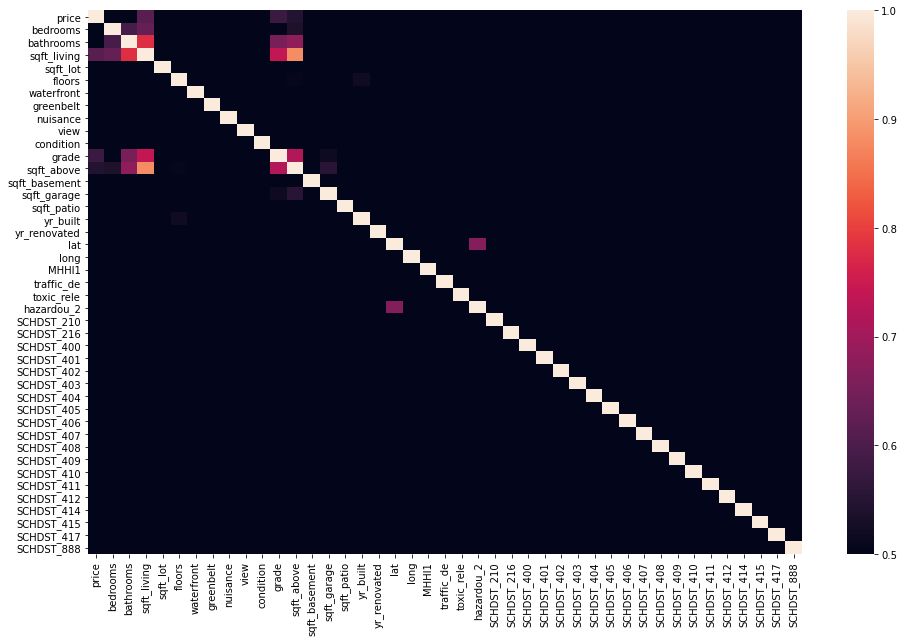

In [53]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(abs(df_clean.corr()), annot=False,ax=ax,vmin=.5)

<AxesSubplot:>

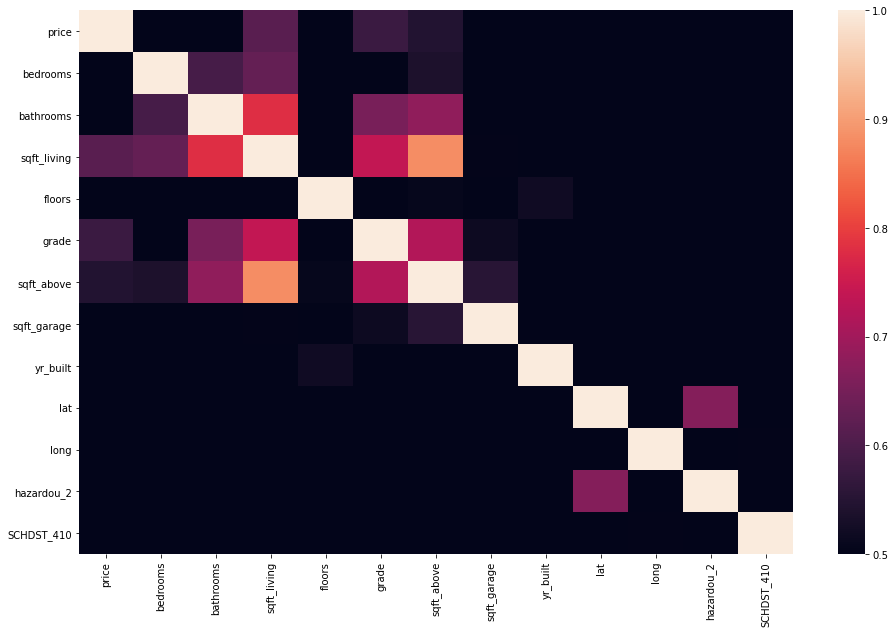

In [54]:
df_cc = abs(df_clean.corr())
threshold = (df_cc > .5) & (df_cc < 1)
df_ccf = df_cc.loc[threshold.any(axis=1),threshold.any(axis=0)]
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df_ccf, annot=False,ax=ax,vmin=.5)

In [55]:
# stack creates a series of tuples
filters = df_ccf[threshold].stack()
filters

price        sqft_living    0.616625
             grade          0.577978
             sqft_above     0.546001
bedrooms     bathrooms      0.593441
             sqft_living    0.630757
             sqft_above     0.537586
bathrooms    bedrooms       0.593441
             sqft_living    0.779778
             grade          0.653047
             sqft_above     0.680801
sqft_living  price          0.616625
             bedrooms       0.630757
             bathrooms      0.779778
             grade          0.739152
             sqft_above     0.881671
             sqft_garage    0.503602
floors       sqft_above     0.505920
             yr_built       0.520881
grade        price          0.577978
             bathrooms      0.653047
             sqft_living    0.739152
             sqft_above     0.720486
             sqft_garage    0.516361
sqft_above   price          0.546001
             bedrooms       0.537586
             bathrooms      0.680801
             sqft_living    0.881671
 

In [56]:
# sorts each tuple so any xy and yx will now all be xy and xy
# when using sorted each variable becomes a list so they need to be converted back to a tuple
#lastly now peform a set on the tuples
filtered = set(tuple(sorted(l,reverse=True)) for l in list(filters.index))
# for f in filtered:
print(f'Highley correlating variables:\n')
list(map(print, sorted(filtered)));

Highley correlating variables:

('bedrooms', 'bathrooms')
('grade', 'bathrooms')
('lat', 'hazardou_2')
('long', 'SCHDST_410')
('price', 'grade')
('sqft_above', 'bathrooms')
('sqft_above', 'bedrooms')
('sqft_above', 'floors')
('sqft_above', 'grade')
('sqft_above', 'price')
('sqft_garage', 'grade')
('sqft_garage', 'sqft_above')
('sqft_living', 'bathrooms')
('sqft_living', 'bedrooms')
('sqft_living', 'grade')
('sqft_living', 'price')
('sqft_living', 'sqft_above')
('sqft_living', 'sqft_garage')
('yr_built', 'floors')


sqft living & Bathrooms


# Creating Regression Models

In [57]:
df_clean.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'lat', 'long', 'MHHI1', 'traffic_de',
       'toxic_rele', 'hazardou_2', 'SCHDST_210', 'SCHDST_216', 'SCHDST_400',
       'SCHDST_401', 'SCHDST_402', 'SCHDST_403', 'SCHDST_404', 'SCHDST_405',
       'SCHDST_406', 'SCHDST_407', 'SCHDST_408', 'SCHDST_409', 'SCHDST_410',
       'SCHDST_411', 'SCHDST_412', 'SCHDST_414', 'SCHDST_415', 'SCHDST_417',
       'SCHDST_888'],
      dtype='object')

In [58]:
def mlr(df,column,model_t=None, simple=False):
    '''
    This runs a Multiple Linear Regression for a set list from df_numeric.
    Call an int to return the list of columns used, mlr(1)
    dataframe,y column, optional single regression add column
    simple: 
    True = simple
    False = multiple
    model_t:
    'x' = return x columns used
    'fit' = no summary
    '''
    df_object = df.select_dtypes(include='object')
    print(f'The following columns were dropped due to being object types\n{df_object.columns}')
    df1 = df.drop(df_object,axis=1)

#     df1 = df.drop(columns=['lat','long','date','sqft_above','sqft_lot','toxic_rele',
#                            'sqft_basement','sqft_patio','yr_renovated'], axis=1)

#     df1 = df[['price', 'traffic_de', 'SCHDST']]
#     df1 = df[['price','bedrooms', 'bathrooms', 'sqft_living',
#        'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
#        'grade', 'yr_built']]
    
    if simple == True:
        highest_corr = correlation(df, column).abs().idxmax()
        x = df[highest_corr]
    elif simple == False:
        x = df1.drop(column, axis=1)
        
    # Define the y variables
    y = df1[column]
    # create model
    model = sm.OLS(y,sm.add_constant(x)).fit()

    if model_t == 'x':
        return(sm.add_constant(x))
    elif model_t == 'fit':
        return(model)
    
    # Model Summary
    return(model.summary())


In [59]:
# This produces r^2 of .493, Cond. 2.33e+05
df_mlr_tester = df_clean[['price','bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'yr_built']]
mlr(df_mlr_tester,'price')

The following columns were dropped due to being object types
Index([], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     2577.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:21:09   Log-Likelihood:            -4.3126e+05
No. Observations:               29170   AIC:                         8.626e+05
Df Residuals:                   29158   BIC:                         8.626e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.764e+06   3.03e+05     28.893      0.000    8.17e+06    9.36e+06
bedrooms    -1.029e+05   5207.827    -19.765      0.000   -1.13e+05   -9.27e+04
bathrooms    9.637e+04   7423.465     12.982      0.000    8.18e+04    1.11e+05
sqft_living   367.5059      7.778     47.246      0.000     352.260     382.752
floors      -4.211e+04   8521.333     -4.942      0.000   -5.88e+04   -2.54e+04
waterfront   1.003e+06   3.16e+04     31.705      0.000    9.41e+05    1.07e+06
greenbelt    4.258e+04   2.36e+04      1.805      0.071   -3666.416    8.88e+04
nuisance     5.096e+04   1.01e+04      5.069      0.000    3.13e+04    7.07e+04
view         6.949e+04   5038.382     13.792      0.000    5.96e+04    7.94e+04
condition    1.351e+04   5649.058      2.391      0.017    2435.578    2.46e+04
grade         2.68e+05   5400.642     49.630      0.000    2.57e+05    2.79e+05
yr_built    -5254.1087    158.201    -33.212      0.000   -5564.189   -4944.028
==============================================================================
Omnibus:                    42107.776   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         54920327.070
Skew:                           8.151   Prob(JB):                         0.00
Kurtosis:                     214.945   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# This produces r^2 of .414, Cond. 2.25e+05
df_mlr_tester2 = df_clean[['price','bedrooms', 'bathrooms', 'sqft_living',
       'floors','yr_built']]
mlr(df_mlr_tester2,'price')

The following columns were dropped due to being object types
Index([], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     4127.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:21:09   Log-Likelihood:            -4.3336e+05
No. Observations:               29170   AIC:                         8.667e+05
Df Residuals:                   29164   BIC:                         8.668e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.557e+06   3.02e+05     28.380      0.000    7.97e+06    9.15e+06
bedrooms    -1.755e+05   5458.360    -32.160      0.000   -1.86e+05   -1.65e+05
bathrooms    1.385e+05   7901.403     17.534      0.000    1.23e+05    1.54e+05
sqft_living   617.3256      6.984     88.391      0.000     603.637     631.015
floors       2.942e+04   8889.428      3.309      0.001     1.2e+04    4.68e+04
yr_built    -4318.6416    156.684    -27.563      0.000   -4625.749   -4011.534
==============================================================================
Omnibus:                    42215.436   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         52496885.692
Skew:                           8.215   Prob(JB):                         0.00
Kurtosis:                     210.178   Cond. No.                     2.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
df_clean_f = df_clean.copy()
df_clean_f.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'lat', 'long', 'MHHI1', 'traffic_de',
       'toxic_rele', 'hazardou_2', 'SCHDST_210', 'SCHDST_216', 'SCHDST_400',
       'SCHDST_401', 'SCHDST_402', 'SCHDST_403', 'SCHDST_404', 'SCHDST_405',
       'SCHDST_406', 'SCHDST_407', 'SCHDST_408', 'SCHDST_409', 'SCHDST_410',
       'SCHDST_411', 'SCHDST_412', 'SCHDST_414', 'SCHDST_415', 'SCHDST_417',
       'SCHDST_888'],
      dtype='object')

In [62]:
df_clean_f['sqft_living'] = np.log(df_clean_f['sqft_living'])
remove = ['lat','long','date','sqft_above','sqft_lot','toxic_rele','yr_renovated',
          'sqft_basement', 'sqft_garage', 'sqft_patio']
df_clean_f1 = df_clean_f.drop(columns=remove)
df_clean_f1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'yr_built',
       'MHHI1', 'traffic_de', 'hazardou_2', 'SCHDST_210', 'SCHDST_216',
       'SCHDST_400', 'SCHDST_401', 'SCHDST_402', 'SCHDST_403', 'SCHDST_404',
       'SCHDST_405', 'SCHDST_406', 'SCHDST_407', 'SCHDST_408', 'SCHDST_409',
       'SCHDST_410', 'SCHDST_411', 'SCHDST_412', 'SCHDST_414', 'SCHDST_415',
       'SCHDST_417', 'SCHDST_888'],
      dtype='object')

In [63]:
mlr(df_clean_f1,'price')

The following columns were dropped due to being object types
Index([], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1195.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:21:09   Log-Likelihood:            -4.2868e+05
No. Observations:               29170   AIC:                         8.574e+05
Df Residuals:                   29136   BIC:                         8.577e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.82e+06   3.44e+05     11.096      0.000    3.15e+06    4.49e+06
bedrooms    -3.014e+04   5040.806     -5.980      0.000      -4e+04   -2.03e+04
bathrooms    1.694e+05   6671.478     25.399      0.000    1.56e+05    1.83e+05
sqft_living  2.437e+05   1.62e+04     15.062      0.000    2.12e+05    2.75e+05
floors      -1.694e+04   8343.474     -2.030      0.042   -3.33e+04    -586.854
waterfront   1.068e+06   2.94e+04     36.307      0.000    1.01e+06    1.13e+06
greenbelt    -5.09e+04    2.2e+04     -2.311      0.021   -9.41e+04   -7735.509
nuisance    -2.317e+04   9341.590     -2.480      0.013   -4.15e+04   -4860.930
view         1.062e+05   4672.065     22.728      0.000     9.7e+04    1.15e+05
condition    2407.6814   5240.805      0.459      0.646   -7864.535    1.27e+04
grade        2.304e+05   5167.115     44.591      0.000     2.2e+05    2.41e+05
yr_built    -3482.2390    165.710    -21.014      0.000   -3807.039   -3157.439
MHHI1           4.3286      0.157     27.491      0.000       4.020       4.637
traffic_de   1.461e+04   1453.751     10.048      0.000    1.18e+04    1.75e+04
hazardou_2   -2.99e+04   3005.963     -9.948      0.000   -3.58e+04    -2.4e+04
SCHDST_210  -2.751e+05   2.04e+04    -13.499      0.000   -3.15e+05   -2.35e+05
SCHDST_216  -3.773e+05   2.46e+04    -15.363      0.000   -4.25e+05   -3.29e+05
SCHDST_400   6.649e+05   3.46e+04     19.210      0.000    5.97e+05    7.33e+05
SCHDST_401  -6.833e+04   1.93e+04     -3.548      0.000   -1.06e+05   -3.06e+04
SCHDST_402  -1.911e+05   4.39e+04     -4.356      0.000   -2.77e+05   -1.05e+05
SCHDST_403  -8.679e+04   1.99e+04     -4.352      0.000   -1.26e+05   -4.77e+04
SCHDST_404  -5.377e+05   1.26e+05     -4.284      0.000   -7.84e+05   -2.92e+05
SCHDST_405   6.705e+05   1.81e+04     37.087      0.000    6.35e+05    7.06e+05
SCHDST_406  -2.421e+04   5.03e+04     -0.481      0.630   -1.23e+05    7.44e+04
SCHDST_407  -3.547e+05   3.11e+04    -11.416      0.000   -4.16e+05   -2.94e+05
SCHDST_408  -2.624e+05   2.06e+04    -12.752      0.000   -3.03e+05   -2.22e+05
SCHDST_409  -3.113e+05   2.13e+04    -14.611      0.000   -3.53e+05    -2.7e+05
SCHDST_410  -2.857e+05   2.41e+04    -11.858      0.000   -3.33e+05   -2.38e+05
SCHDST_411  -8840.4987   1.78e+04     -0.495      0.620   -4.38e+04    2.61e+04
SCHDST_412  -1.228e+05   2.07e+04     -5.920      0.000   -1.63e+05   -8.21e+04
SCHDST_414   1.268e+05   1.77e+04      7.153      0.000     9.2e+04    1.62e+05
SCHDST_415  -2.787e+05    1.9e+04    -14.631      0.000   -3.16e+05   -2.41e+05
SCHDST_417   -1.59e+05   2.17e+04     -7.315      0.000   -2.02e+05   -1.16e+05
SCHDST_888  -3.255e+05   5.89e+04     -5.526      0.000   -4.41e+05    -2.1e+05
==============================================================================
Omnibus:                    47634.774   Durb

In [64]:
# no outliers data set
df_no_outliers1 = df_no_outliers[[ 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built','MHHI1',
       'traffic_de', 'toxic_rele', 'hazardou_2']]
mlr(df_no_outliers1,'price')

NameError: name 'df_no_outliers' is not defined

# Testing the VIFs
- Use to gauge how much the error around the beta for a particular variable is increased because of multicollinearity

In [ ]:
df_mlr = df_clean.drop(columns=['lat','long','date','sqft_above','sqft_lot','sqft_garage',
                           'sqft_basement','sqft_patio','yr_renovated'], axis=1)
# vif_model = sm.OLS(endog=df['table'], exog=sm.add_constant(df.drop('table', axis=1))).fit()

vif_model = mlr(df_mlr,'price','fit')
vif_table = 1 / (1-vif_model.rsquared)
vif_table

In [ ]:
vif_model.summary()

In [ ]:
sm.graphics.plot_regress_exog(vif_model, 'view', fig=plt.figure(figsize=(12, 8)));

In [ ]:
from sklearn.linear_model import LinearRegression
df_object = df_mlr.select_dtypes(include='object')
print(f'The following columns were dropped due to being object types\n{df_object.columns}')
df_skl = df_mlr.drop(df_object,axis=1)
model_sklr = LinearRegression().fit(df_skl, df_mlr['price'])

In [ ]:
model_sklr.score(df_skl, df_mlr['price'])

## Simple Model

In [65]:
mlr(df_clean,'price',True)

The following columns were dropped due to being object types
Index([], dtype='object')


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [66]:
remove = ['lat','long','date','toxic_rele','yr_renovated',
          'sqft_above','sqft_lot','sqft_basement', 'sqft_garage', 'sqft_patio','MHHI1']
df_clean2 = df_clean.drop(columns=remove)

In [67]:
mlr(df_clean2,'price')

The following columns were dropped due to being object types
Index([], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1371.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:21:13   Log-Likelihood:            -4.2777e+05
No. Observations:               29170   AIC:                         8.556e+05
Df Residuals:                   29137   BIC:                         8.559e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.373e+06   3.05e+05     14.324      0.000    3.77e+06    4.97e+06
bedrooms    -9.011e+04   4656.008    -19.353      0.000   -9.92e+04    -8.1e+04
bathrooms    4.971e+04   6658.310      7.466      0.000    3.67e+04    6.28e+04
sqft_living   389.1926      7.123     54.641      0.000     375.232     403.153
floors      -2.102e+04   8071.766     -2.604      0.009   -3.68e+04   -5199.467
waterfront   1.043e+06   2.85e+04     36.613      0.000    9.87e+05     1.1e+06
greenbelt   -4.347e+04   2.13e+04     -2.038      0.042   -8.53e+04   -1671.154
nuisance    -2.256e+04   9053.174     -2.492      0.013   -4.03e+04   -4819.798
view         8.585e+04   4539.583     18.911      0.000    7.69e+04    9.47e+04
condition     1.92e+04   5088.860      3.772      0.000    9222.096    2.92e+04
grade        1.557e+05   5037.993     30.911      0.000    1.46e+05    1.66e+05
yr_built    -2430.8128    161.504    -15.051      0.000   -2747.368   -2114.258
traffic_de   2187.8585   1349.342      1.621      0.105    -456.913    4832.630
hazardou_2  -5.281e+04   2816.975    -18.745      0.000   -5.83e+04   -4.73e+04
SCHDST_210  -2.628e+05   1.96e+04    -13.378      0.000   -3.01e+05   -2.24e+05
SCHDST_216  -5.657e+05   2.36e+04    -23.936      0.000   -6.12e+05   -5.19e+05
SCHDST_400   8.467e+05   3.22e+04     26.299      0.000    7.84e+05     9.1e+05
SCHDST_401  -1.381e+05   1.87e+04     -7.396      0.000   -1.75e+05   -1.01e+05
SCHDST_402  -3.295e+05   4.24e+04     -7.766      0.000   -4.13e+05   -2.46e+05
SCHDST_403   -7.23e+04   1.91e+04     -3.778      0.000    -1.1e+05   -3.48e+04
SCHDST_404  -7.056e+05   1.22e+05     -5.799      0.000   -9.44e+05   -4.67e+05
SCHDST_405   7.062e+05   1.72e+04     41.150      0.000    6.73e+05     7.4e+05
SCHDST_406  -9.697e+04   4.88e+04     -1.989      0.047   -1.93e+05   -1407.852
SCHDST_407  -4.421e+05   3.01e+04    -14.681      0.000   -5.01e+05   -3.83e+05
SCHDST_408  -3.075e+05   1.99e+04    -15.433      0.000   -3.47e+05   -2.68e+05
SCHDST_409  -3.109e+05   2.03e+04    -15.282      0.000   -3.51e+05   -2.71e+05
SCHDST_410  -4.002e+05   2.34e+04    -17.133      0.000   -4.46e+05   -3.54e+05
SCHDST_411   3.423e+04   1.67e+04      2.050      0.040    1504.102    6.69e+04
SCHDST_412  -2.007e+05   2.01e+04     -9.998      0.000    -2.4e+05   -1.61e+05
SCHDST_414   1.163e+05    1.7e+04      6.827      0.000    8.29e+04     1.5e+05
SCHDST_415  -2.261e+05    1.8e+04    -12.539      0.000   -2.61e+05   -1.91e+05
SCHDST_417  -2.316e+05    2.1e+04    -11.003      0.000   -2.73e+05    -1.9e+05
SCHDST_888   -2.58e+05   5.69e+04     -4.532      0.000    -3.7e+05   -1.46e+05
==============================================================================
Omnibus:                    48625.456   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarqu

There is a significantly high multicollinearity between variables

# Checking Assumptions

Defining x, y, and the model variables

In [219]:
remove5 = ['lat','long','date','yr_renovated']
df_clean5 = df_clean.drop(columns=remove5)
# df_clean5['sqft_living'] = np.log(df_clean5['sqft_living'])
df_clean5['price'] = np.log(df_clean5['price'])

In [220]:
# model
model_mlr = mlr(df_clean5,'price', 'fit',False)
# X constant
X = mlr(df_clean5,'price','x',False)
# y 
Y = df_clean5['price']

The following columns were dropped due to being object types
Index([], dtype='object')
The following columns were dropped due to being object types
Index([], dtype='object')


## 1. Linearity

In [211]:
resid

0        3.792140e+05
1        1.937898e+05
2        5.908781e+04
3       -5.356957e+04
4       -2.253980e+04
             ...     
29206    7.450498e+05
29207   -4.130424e+04
29208    5.068139e+05
29209    1.489890e+05
29210   -1.981233e+06
Length: 29170, dtype: float64

Slope: -4.4737365269860544e-13
Intercept: -6.1136756903435e-06
Correlation: (r) -5.805278796399186e-13


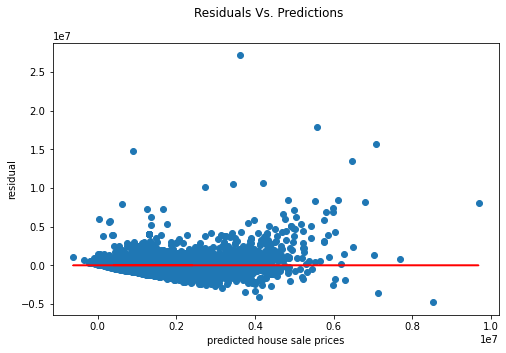

In [212]:
from scipy.stats import linregress
# calculating resid method 1
# model_L = model_mlr.predict(X)
# resid = Y - model_L
# x_res = model_L
# y_res = resid

# calculating resid method 2
resid = model_mlr.resid
x_res = model_mlr.predict()


fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_res, resid)
# sns.regplot(x=x_res, y=resid, line_kws={'ls':'-', 'color': 'r'}, ci = None)

slope, intercept, r, p, se = linregress(x_res,resid)
lin_r = linregress(x_res, resid)
plt.plot(x_res, lin_r.intercept + lin_r.slope*x_res, 'r')

print('Slope:', slope)
print('Intercept:', intercept)
print('Correlation: (r)', r)

ax.set_xlabel('predicted house sale prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

# 2. Independence
Checking if errors are independent
- Create scatter plot of residuals and target values
    - Evaluete and identify patterns
- Check Durbin-Watson Statistic

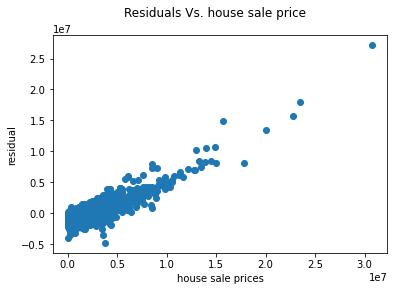

In [213]:
fig, ax = plt.subplots()
# sns.regplot(x = Y, y = resid,line_kws={'ls':'-', 'color': 'r'}, ci = None)
ax.scatter(Y, resid)
ax.set_xlabel('house sale prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. house sale price');

- Upward trend in this scatter plot indicates positive correlation in the errors

### Durbin-Watson
- Checks for autocorrelation in the residuals.
- Autocorrelation occurs when residuals are not independent.
- The range is from 0-4 
- values close to 2 indcate no significant autocorrelation (1.5 - 2.5)
- Values below 2 indicate positive autocorrelation
- Values above 2 indicate negative autocorrelation

In [214]:
dw = sm.stats.stattools.durbin_watson
dw(resid)

1.6424426287108227

Our autocorrelation from the Durbin-Watson test indicates a little to no signifcant autocorrelation

Possible positive auto correlation

In [215]:
model_mlr.summary().tables[2]

Omnibus:,48483.000,Durbin-Watson:,1.642
Prob(Omnibus):,0.000,Jarque-Bera (JB):,145408658.631
Skew:,10.687,Prob(JB):,0.00
Kurtosis:,348.225,Cond. No.,1.02e+07


## 3. Normality

### Histograms

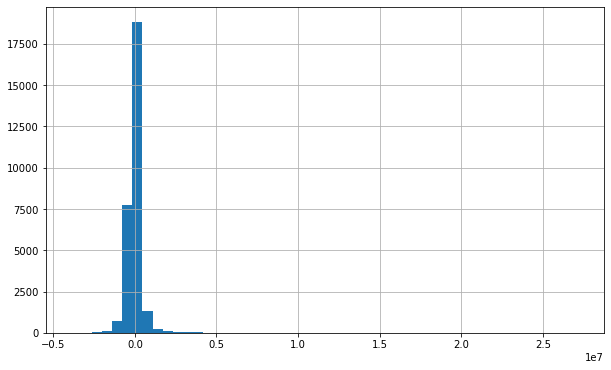

In [100]:
resid.hist(bins=50,figsize=(10,6));

Resizing the histogram to remove outliers

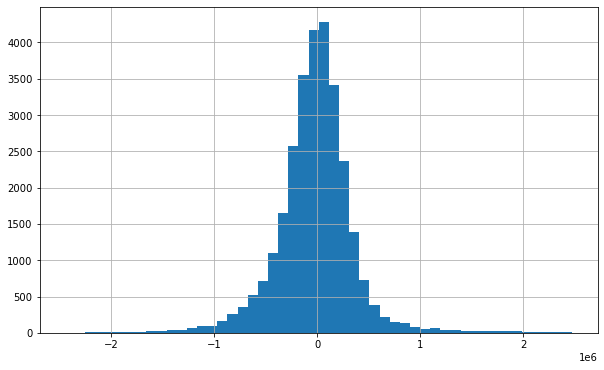

In [120]:

resid[abs(resid) < 2500000].hist(bins=50,figsize=(10,6));

### QQ Plot

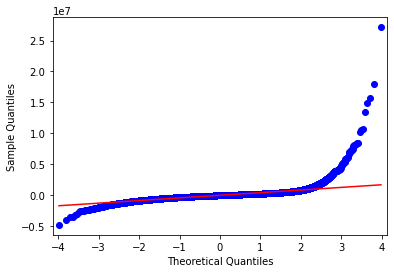

In [216]:
sm.qqplot(resid, line='r');

### Homoskedasticity

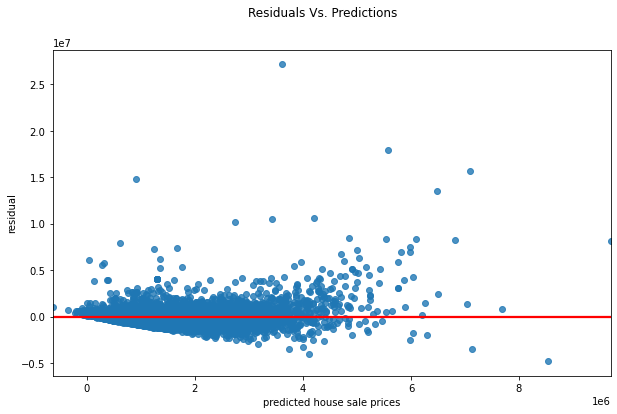

In [263]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x = x_res, y = resid,line_kws={'ls':'-', 'color': 'r'}, ci = None)
ax.set_xlabel('predicted house sale prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');
# ax.scatter(Y, resid);

In [184]:
model_mlr.predict(df_clean5)

0        1.302927e+12
1        1.405231e+12
2        1.245019e+12
3        1.468158e+12
4        1.206317e+12
             ...     
29206    7.334982e+11
29207    3.841209e+11
29208    7.624524e+11
29209    6.331250e+11
29210    1.158159e+12
Length: 29170, dtype: float64

In [185]:
df_clean['price']

0        675000.0
1        728000.0
2        645000.0
3        760600.0
4        624950.0
           ...   
29206    380000.0
29207    199000.0
29208    395000.0
29209    328000.0
29210    600000.0
Name: price, Length: 29170, dtype: float64

Slope: 0.9118597204307495
Intercept: 142385.33029798896
Correlation: (r) 0.8034186696012866


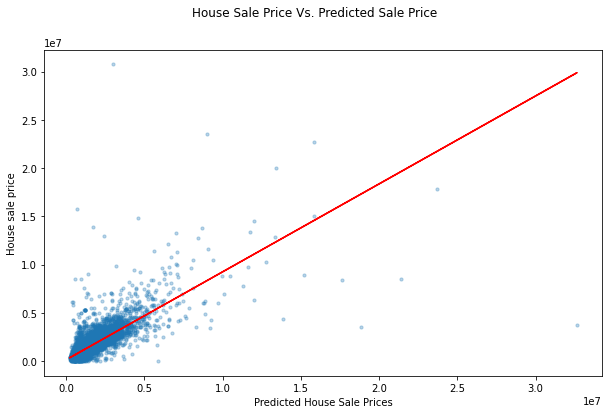

In [224]:
fig, ax = plt.subplots(figsize=(10,6))

x_pre = np.exp(model_mlr.predict(X))
y_pre = np.exp(Y)
# sns.regplot(x =x_pre, y = y_pre,line_kws={'ls':'-', 'color': 'r'}, ci = None)
ax.scatter(x_pre, y_pre,s=10,alpha=.3)


slope, intercept, r, p, se = linregress(x_pre,y_pre)
lin_r = linregress(x_pre, y_pre)
plt.plot(x_pre, lin_r.intercept + lin_r.slope*x_pre, 'r')

print('Slope:', slope)
print('Intercept:', intercept)
print('Correlation: (r)', r)

ax.set_xlabel('Predicted House Sale Prices')
ax.set_ylabel('House sale price')
plt.suptitle('House Sale Price Vs. Predicted Sale Price');

In [262]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mean squared error
mse = mean_squared_error(x_pre,y_pre)
print("Mean Squared Error (MSE):", mse)

# Mean absolute error
mae = mean_absolute_error(x_pre,y_pre)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 291468602365.7654
Mean Absolute Error (MAE): 230535.5375599474


Mean Absolute Error (MAE): 230535.5375599474


# Transformations

In [ ]:
def kde_plot(xy,x_label,legends=False):
    '''
    xy: Y or X
    x_label: str name for Y or X
    legends: set to True, to show
    Example for what x or y would look like:
    y = df['column']
    x = df[['column1','columns2','column3']]
    
    Example: kde_plot(Y,'price') where Y= df['price']

    '''
    name = str(xy)
    fig, ax = plt.subplots(figsize=(16, 10))
    sns.kdeplot(data=xy,legend=legends, ax=ax)
    plt.title(f'KDE plot of {x_label}')
    plt.xlabel(x_label)
    plt.ylabel('Density')

In [ ]:
kde_plot(np.log(Y),'price')

In [ ]:
x_tester = df_clean[['bathrooms','bedrooms']]
kde_plot(x_tester,'variables',True)

In [ ]:
# Create a 5x8 grid of subplots for the KDE plots
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(16, 10))

# Flatten the grid of subplots into a 1D array
axes = axes.flatten()

# Loop through each variable and plot its KDE on a subplot
for k, v in enumerate(X.columns):
    sns.kdeplot(data=X[v], ax=axes[k], color='red')
    axes[k].set_title(v)

# Adjust the spacing between the subplots and show the plot
plt.tight_layout()
plt.show()

### Checking Distribution of Price

In [ ]:
df_clean['price'].hist()

In [ ]:
x_logged = np.log(df_clean['price'])
x_logged.hist()

In [ ]:
Y.hist();

In [ ]:
y_scld = np.log(Y)
y_scld.hist();

In [ ]:
y_scld2 = np.log(y_scld)
y_scld2.hist();

In [ ]:
y_scld3 = np.log(y_scld2)
y_scld3.hist();

In [ ]:
df_clean

In [ ]:
# Creating new df and transforming price (Y)
df_transformed = df_clean.copy()
df_transformed = df_transformed.drop(columns='date')
df_transformed['price'] = y_scld#np.log(Y)
df_transformed['sqft_living'] = np.log(df_clean['sqft_living'])
df_transformed.info()

In [ ]:
df_transformed.columns

In [ ]:
df_t_f =df_transformed[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
        'yr_built', 'traffic_de',
       'hazardou_2', 'SCHDST_210', 'SCHDST_216', 'SCHDST_400', 'SCHDST_401',
       'SCHDST_402', 'SCHDST_403', 'SCHDST_404', 'SCHDST_405', 'SCHDST_406',
       'SCHDST_407', 'SCHDST_408', 'SCHDST_409', 'SCHDST_410', 'SCHDST_411',
       'SCHDST_412', 'SCHDST_414', 'SCHDST_415', 'SCHDST_417', 'SCHDST_888']]
df_t_f1 =df_transformed[['price', 'MHHI1','traffic_de','hazardou_2',
                         'SCHDST_210', 'SCHDST_216', 'SCHDST_400', 'SCHDST_401',
       'SCHDST_402', 'SCHDST_403', 'SCHDST_404', 'SCHDST_405', 'SCHDST_406',
       'SCHDST_407', 'SCHDST_408', 'SCHDST_409', 'SCHDST_410', 'SCHDST_411',
       'SCHDST_412', 'SCHDST_414', 'SCHDST_415', 'SCHDST_417', 'SCHDST_888']]
model_Transform = mlr(df_t_f, 'price')

In [ ]:
model_Transform

In [ ]:
df_clean_3 = df_clean.copy()
df_clean_3['sqft_living'] = np.log(df_clean_3['sqft_living'])
# df_clean_3['price'] = y_scld#np.log(Y)
remove3 = ['lat','long','date','toxic_rele','yr_renovated',
          'sqft_above','sqft_lot','sqft_basement', 'sqft_garage', 'sqft_patio','MHHI1','condition','greenbelt']
df_clean3 = df_clean_3.drop(columns=remove3)
df_clean3.columns

In [ ]:
model_clean3 = mlr(df_clean3, 'price')

In [ ]:
model_clean3

In [ ]:
df_clean.columns

In [ ]:
cdf = df_clean.copy()

# remove4 = ['lat','long','date','toxic_rele','yr_renovated','sqft_above','sqft_lot','sqft_basement', 
#            'sqft_garage', 'sqft_patio','MHHI1','sqft_living']
# cdf_df = cdf.drop(columns=remove4)


cdf['sqft_living'] = np.log(cdf['sqft_living'])
cdf['yr_built'] = np.log(cdf['yr_built'])
# df_clean_3['price'] = y_scld#np.log(Y)


cdf_df = cdf[['price', 'bedrooms', 'bathrooms','sqft_living',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'traffic_de','yr_built', 'hazardou_2']]
mlr(cdf_df,'price')

# Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
# pf = PolynomialFeatures(degree=3)

# X = wine.drop('quality', axis=1)
# y = wine['quality']

# # Fitting the PolynomialFeatures object
# pf.fit(X)

In [ ]:
X1 = ['floors','MHHI1', 'traffic_de', 'toxic_rele', 'hazardou_2']
y1 = df_clean['price']

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

axs[0].scatter(df_clean[X1[0]], y1)
axs[0].set_xlabel(f'{X1[0]}')
axs[0].set_ylabel('Price ($)')
axs[0].set_title(f'{X1[0]} vs. Price')

axs[1].scatter(df_clean[X1[1]], y1)
axs[1].set_xlabel(f'{X1[1]}')
axs[1].set_ylabel('Price ($)')
axs[1].set_title(f'{X1[1]} vs. Price')

axs[2].scatter(df_clean[X[2]], y1)
axs[2].set_xlabel(f'{X1[2]}')
axs[2].set_ylabel('Price ($)')
axs[2].set_title(f'{X1[2]} vs. Price')

plt.show()

In [ ]:
# fig, ax = plt.subplots()
# ax.scatter(X,y); 

# ax.set_xlabel('Square Foot Living (ft)')
# ax.set_ylabel('Price ($)')
# ax.set_title('Price of Houses based on Square foot')

# plt.show()

In [ ]:
# sns.lmplot(data=df_cleaned_2, x='sqft_living', y='price')
# plt.xlabel('Sqft Living (sqft)')
# plt.ylabel('Price ($)')
# plt.title('Price against to Sqft Living');